### Run in collab
<a href="https://colab.research.google.com/github/racousin/data_science_practice/blob/master/website/public/modules/data-science-practice/module9/exercise/module9_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# module9_exercise1 : Q Learning

### Objective
Implement and train a Q-Learning agent to interact with and learn from the 'FrozenLake-v1' environment without a known model.

### Experiment Setup: Evaluate and Train Your Agent

`run_experiment_episode_train` is the core function you will use for agent-environment interaction and learning:

In [16]:
env = gym.make('FrozenLake-v1', map_name="8x8")

def run_experiment_episode_train(env, agent, nb_episode, is_train=True):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()[0]
        terminated, truncated = False, False
        rews = []
        while not (terminated or truncated):
            action = agent.act(state)
            current_state = state
            state, reward, terminated, truncated, info = env.step(action)
            if is_train:
                agent.train(current_state, action, reward, state, terminated or truncated)
            rews.append(reward)
        rewards[i] = sum(rews)
        print(f'Episode: {i} - Cumulative Reward: {rewards[i]}')
    return rewards


In [3]:
class Agent:
    def __init__(self, env):
        self.env = env
    def act(self, state):
        action = env.action_space.sample()
        return action
    def train(self, current_state, action, reward, state, done):
        pass

In [ ]:
demo_agent = Agent(env)
run_experiment_episode_train(env, demo_agent, nb_episode=10, is_train=True)

**Exercise 1:** Initialize Q-Learning Agent

**Task 1a:** Initialize the `Agent` class with a Q-table filled with random values. The Q-table should have dimensions corresponding to the environment's state and action space sizes.

**Task 1b:** Create a function, `get_epsilon_greedy_action_from_Q_s`, that chooses an action based on an epsilon-greedy strategy or the argmax of Q for the current state.

**Task 1c:** Update the Agent class's act function to utilize `get_epsilon_greedy_action_from_Q_s` for action selection.

**Task 1d:** Implement the Q-learning update formula in the Agent class's train method.

$Q(S_t,A_t) \leftarrow Q(S_t,A_t)+ \alpha(R_{t+1}+\gamma \max_a Q(S_{t+1},a)−Q(S_t,A_t))$

**Exercise 2:** Train and Evaluate the Agent

**Task 2a:** Run 100 training episodes with the Q-learning agent and collect the rewards.

**Task 2b:** Plot the cumulative reward for each training episode.

**Question 1:**

How can we improve the convergence of our Q-learning agent? Suggestion: add a epsilon_decay_exponential in the train method.

In [17]:
#Done: get epsilon greedy policy
def get_epislon_greedy_action_from_q(Q_s,epsilon):
    if np.random.rand() > epsilon:
        return np.argmax(Q_s)
    else:
        return np.random.randint(len(Q_s))

In [18]:
#Done: write Q learning update
class Agent():
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        self.env = env
        self.gamma = gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.q = np.ones([self.env.observation_space.n, self.env.action_space.n])
    def act(self, state):
        action = get_epislon_greedy_action_from_q(self.q[state], self.epsilon)
        return action
    def qsa_update(self, state, action, reward, next_state, done): 
        target = reward + (0 if done else self.gamma * np.max(self.q[next_state]))
        td_error = target - self.q[state, action]
        self.q[state, action]  += self.alpha * td_error
    def train(self, current_state, action, reward, next_state, done):
        self.qsa_update(current_state, action, reward, next_state, done)

In [19]:
q_agent = Agent(env)
rewards = run_experiment_episode_train(env, q_agent, 10000)

Episode: 0 - Cumulative Reward: 0.0
Episode: 1 - Cumulative Reward: 0.0
Episode: 2 - Cumulative Reward: 0.0
Episode: 3 - Cumulative Reward: 0.0
Episode: 4 - Cumulative Reward: 0.0
Episode: 5 - Cumulative Reward: 0.0
Episode: 6 - Cumulative Reward: 0.0
Episode: 7 - Cumulative Reward: 0.0
Episode: 8 - Cumulative Reward: 0.0
Episode: 9 - Cumulative Reward: 0.0
Episode: 10 - Cumulative Reward: 0.0
Episode: 11 - Cumulative Reward: 0.0
Episode: 12 - Cumulative Reward: 0.0
Episode: 13 - Cumulative Reward: 0.0
Episode: 14 - Cumulative Reward: 0.0
Episode: 15 - Cumulative Reward: 0.0
Episode: 16 - Cumulative Reward: 0.0
Episode: 17 - Cumulative Reward: 0.0
Episode: 18 - Cumulative Reward: 0.0
Episode: 19 - Cumulative Reward: 0.0
Episode: 20 - Cumulative Reward: 0.0
Episode: 21 - Cumulative Reward: 0.0
Episode: 22 - Cumulative Reward: 0.0
Episode: 23 - Cumulative Reward: 0.0
Episode: 24 - Cumulative Reward: 0.0
Episode: 25 - Cumulative Reward: 0.0
Episode: 26 - Cumulative Reward: 0.0
Episode: 27

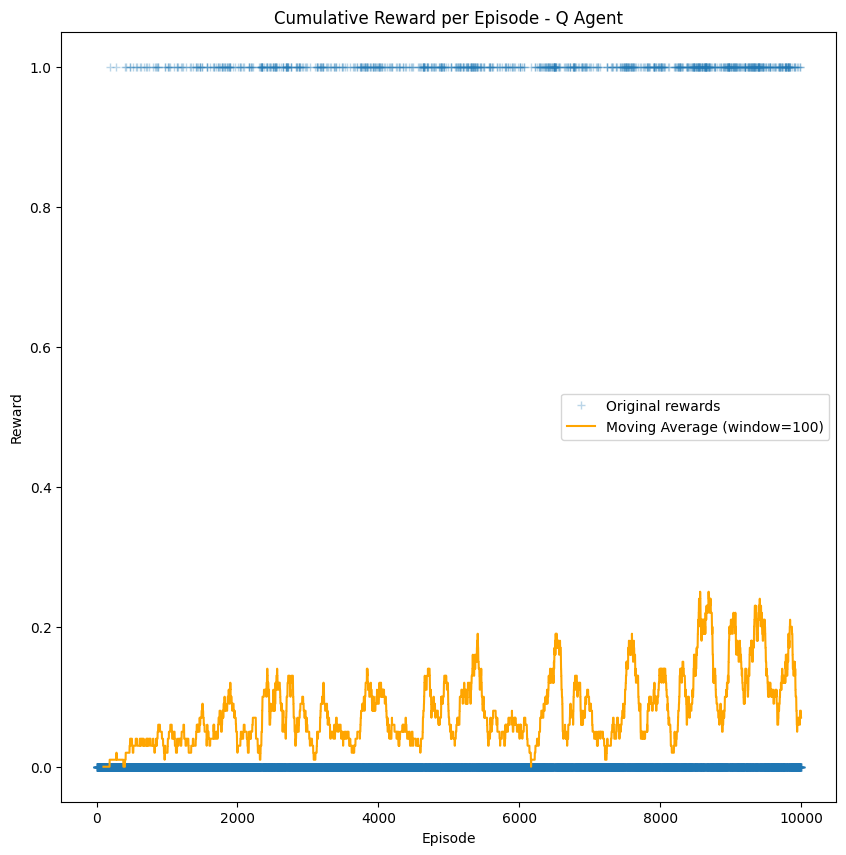

In [20]:
window_size = 100
moving_avg = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

# Plot the results
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(rewards, '+', alpha=0.3, label='Original rewards')
ax.plot(range(window_size-1, len(rewards)), moving_avg, label=f'Moving Average (window={window_size})', color='orange')
ax.set_title('Cumulative Reward per Episode - Q Agent')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()

plt.show()

In [1]:
#TODO: write Q learning update
class DecayAgent():
    # Same other method as Agent
    def train(self, current_state, action, reward, next_state, done):
        self.qsa_update(current_state, action, reward, next_state, done)
        self.epsilon_decay_exponential()

In [ ]:
# Initialize agents with random and optimal policies
decay_agent = DecayAgent(env)
agent = Agent(env)

# Run experiments for each agent
rewards_decay_agent = run_experiment_episode_train(env, decay_agent, 1000)
rewards_agent = run_experiment_episode_train(env, agent, 1000)


In [ ]:
# Compute the moving average with a window size of 100
window_size = 100
moving_avg = np.convolve(rewards_agent, np.ones(window_size) / window_size, mode='valid')
moving_avg_decay = np.convolve(rewards_decay_agent, np.ones(window_size) / window_size, mode='valid')

# Plot with subplots
plt.figure(figsize=(14, 6))

# First subplot: Original rewards with moving average for decay_agent
plt.subplot(1, 2, 1)
plt.plot(rewards_agent, 'o', alpha=0.3, label='Original rewards')
plt.plot(range(window_size - 1, len(rewards_agent)), moving_avg, label=f'Moving Avg (window={window_size})', color='orange')
plt.title('Cumulative Reward per Episode - decay_agent')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()

# Second subplot: Original rewards with moving average for agent
plt.subplot(1, 2, 2)
plt.plot(rewards_decay_agent, 'o', alpha=0.3, label='Original rewards')
plt.plot(range(window_size - 1, len(rewards_decay_agent)), moving_avg_decay, label=f'Moving Avg (window={window_size})', color='orange')
plt.title('Cumulative Reward per Episode - agent')
plt.xlabel('Episode')
plt.legend()

# Adjust layout and show
plt.tight_layout()
plt.show()


In [ ]:
# Watch your agent play

from rl_introduction.rl_introduction.render_colab import exp_render
exp_render({"name":'FrozenLake-v1', "fps":2, "nb_step":30, "agent": decay_agent})

# creat/train/test your agent in other discrete action-space env

In [ ]:
env = gym.make('Blackjack-v1')
env = gym.make('Taxi-v3')

In [ ]:
your_agent = 
nb_episode = 10
run_experiment_episode_train(env, your_agent, nb_episode, is_train=True)